In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("mark_sheet_dataset.csv")

In [4]:
df

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...,...,...
1000,S2001,Male,30.000000,20.000000,25.000000,40.000000
1001,S2002,Male,135.000000,125.000000,120.000000,100.000000
1002,S1001,Female,79.967142,86.792265,72.598574,75.460962
1003,S1002,Male,73.617357,81.095604,76.843851,80.698075


In [5]:
df.head()

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766


In [6]:
df.tail()

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
1000,S2001,Male,30.000000,20.000000,25.000000,40.000000
1001,S2002,Male,135.000000,125.000000,120.000000,100.000000
1002,S1001,Female,79.967142,86.792265,72.598574,75.460962
1003,S1002,Male,73.617357,81.095604,76.843851,80.698075
1004,S1003,Female,81.476885,70.715564,71.660641,82.931972


In [7]:
df.describe()

,Math_Score,English_Score,Science_Score,Attendance
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,75.219844,70.877752,78.021221,84.858825
std,10.058027,12.188226,8.141387,5.348865
min,30.000000,20.000000,25.000000,40.000000
25%,68.524097,62.725100,72.801361,81.233628
50%,75.264884,70.756926,77.951531,84.976378
75%,81.479439,78.824432,83.287323,88.334727
max,135.000000,125.000000,120.000000,101.215465


In [8]:
df.columns

Index(['Student_ID', 'Gender', 'Math_Score', 'English_Score', 'Science_Score',
       'Attendance'],
      dtype='object')

In [9]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       1
English_Score    1
Science_Score    1
Attendance       1
dtype: int64

In [10]:
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].median())

In [11]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    1
Science_Score    1
Attendance       1
dtype: int64

In [12]:
df["English_Score"] = df["English_Score"].fillna(df["English_Score"].median())

In [13]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    1
Attendance       1
dtype: int64

In [14]:
df["Science_Score"] = df["Science_Score"].fillna(df["Science_Score"].median())

In [15]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       1
dtype: int64

In [16]:
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].median())

In [17]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Math_Score', ylabel='Count'>

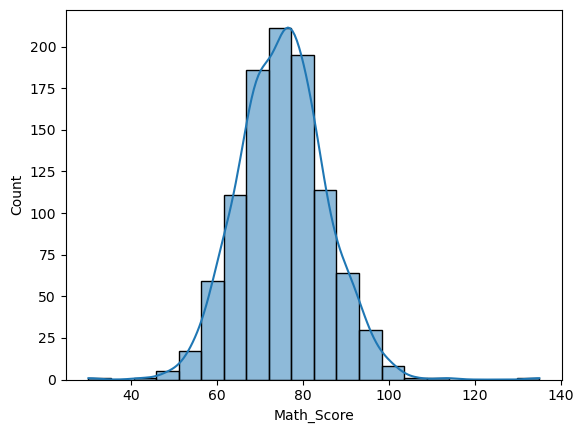

In [19]:
sns.histplot(df["Math_Score"],bins=20,kde=True)

<Axes: xlabel='English_Score', ylabel='Count'>

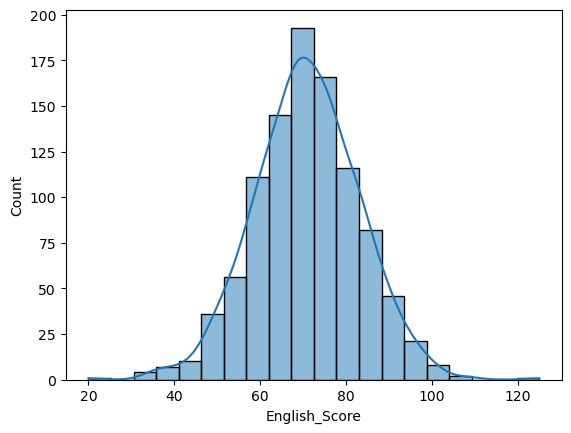

In [20]:
sns.histplot(df["English_Score"],bins=20,kde=True)

<Axes: xlabel='Science_Score', ylabel='Count'>

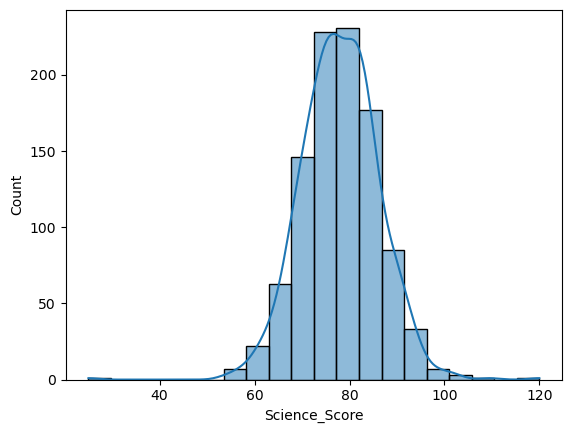

In [21]:
sns.histplot(df["Science_Score"],bins=20,kde=True)

<Axes: xlabel='Attendance', ylabel='Count'>

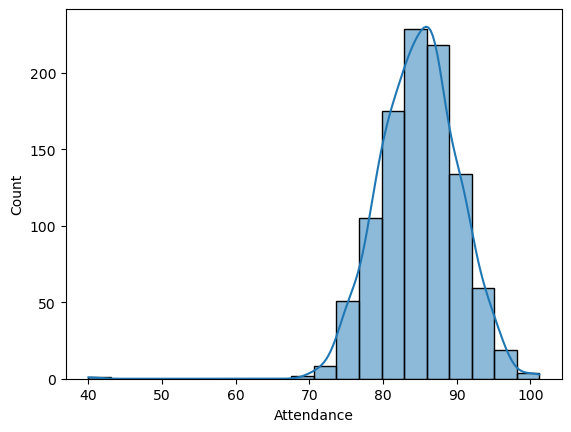

In [22]:
sns.histplot(df["Attendance"],bins=20,kde=True)

In [23]:
from scipy.stats import zscore
z_scores = df[['Math_Score','English_Score','Science_Score','Attendance']].apply(zscore)

In [24]:
z_scores

,Math_Score,English_Score,Science_Score,Attendance
0,0.472457,1.307039,-0.666715,-1.758755
1,-0.159487,0.839183,-0.144751,-0.778672
2,0.622710,-0.013310,-0.782035,-0.360617
3,1.493868,-0.709659,-0.305516,1.792724
4,-0.254918,0.616047,-1.865184,0.547170
...,...,...,...,...
1000,-4.500381,-4.178486,-6.519035,-8.394983
1001,5.949445,4.444970,5.161366,2.833525
1002,0.472457,1.307039,-0.666715,-1.758755
1003,-0.159487,0.839183,-0.144751,-0.778672


In [25]:
outliers = (z_scores < -3) | (z_scores > 3)

In [26]:
total_outliers = outliers.sum()

In [27]:
print(total_outliers)

Math_Score       5
English_Score    4
Science_Score    4
Attendance       2
dtype: int64


In [28]:
numeric_cols = ['Math_Score','English_Score','Science_Score',]
original_stats = {}

In [29]:
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] =df[col].fillna(mean_val)
    std_val = df[col].std()
    original_stats[col] = (mean_val,std_val)
    df[col] =df[col].clip(lower = mean_val - 3 * std_val,upper = mean_val + 3 * std_val)
    print(f"clipped values in {col}")

clipped values in Math_Score
clipped values in English_Score
clipped values in Science_Score


In [30]:
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    mean_val , std_val = original_stats[col]
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    outliers_remaining = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers_remaining == 0:
       print(f"outliers is {outliers_remaining} in {col}")
    else:
        print("outliers are there")

outliers is 0 in Math_Score
outliers is 0 in English_Score
outliers is 0 in Science_Score


<Figure size 1200x1400 with 0 Axes>

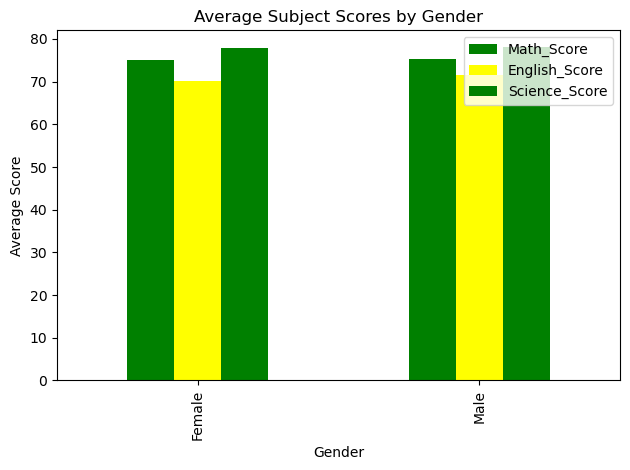

In [31]:
colors =['green','yellow','green'] 
plt.figure(figsize=(12,14 ))
avg_scores_by_gender = df.groupby("Gender")[["Math_Score", "English_Score", "Science_Score"]].mean().reset_index()
avg_scores_by_gender.set_index("Gender").plot(kind='bar',color=colors)
plt.title("Average Subject Scores by Gender")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

In [32]:
avg_scores_by_gender

,Gender,Math_Score,English_Score,Science_Score
0,Female,75.084237,70.085582,77.927147
1,Male,75.316071,71.672042,78.123729


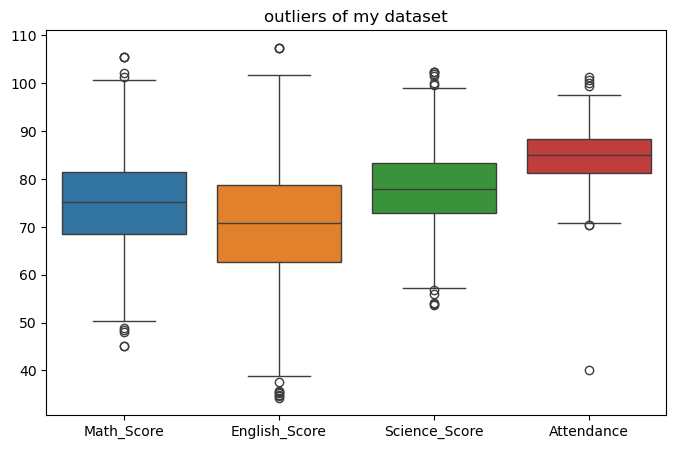

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("outliers of my dataset")
plt.show()

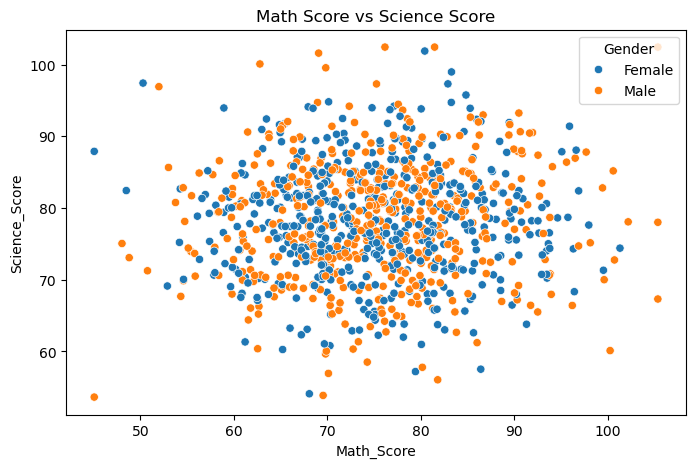

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Math_Score', y='Science_Score', hue='Gender')
plt.title("Math Score vs Science Score")
plt.show()

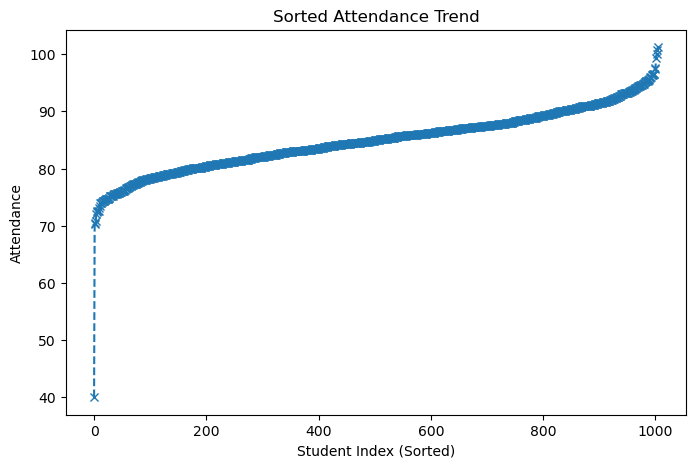

In [35]:
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by='Attendance')
plt.plot(df_sorted['Attendance'].values, marker='x', linestyle='--')
plt.title("Sorted Attendance Trend")
plt.xlabel("Student Index (Sorted)")
plt.ylabel("Attendance")
plt.show()

In [36]:
df.drop('Gender',axis=1,inplace=True)

In [37]:
df

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
0,S1001,79.967142,86.792265,72.598574,75.460962
1,S1002,73.617357,81.095604,76.843851,80.698075
2,S1003,81.476885,70.715564,71.660641,82.931972
3,S1004,90.230299,62.236759,75.536308,94.438438
4,S1005,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...,...
1000,S2001,45.060838,34.331166,53.609156,40.000000
1001,S2002,105.378939,107.424099,102.433148,100.000000
1002,S1001,79.967142,86.792265,72.598574,75.460962
1003,S1002,73.617357,81.095604,76.843851,80.698075


In [38]:
df.drop('Student_ID',axis=1,inplace=True)

In [39]:
df

,Math_Score,English_Score,Science_Score,Attendance
0,79.967142,86.792265,72.598574,75.460962
1,73.617357,81.095604,76.843851,80.698075
2,81.476885,70.715564,71.660641,82.931972
3,90.230299,62.236759,75.536308,94.438438
4,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...
1000,45.060838,34.331166,53.609156,40.000000
1001,105.378939,107.424099,102.433148,100.000000
1002,79.967142,86.792265,72.598574,75.460962
1003,73.617357,81.095604,76.843851,80.698075


AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

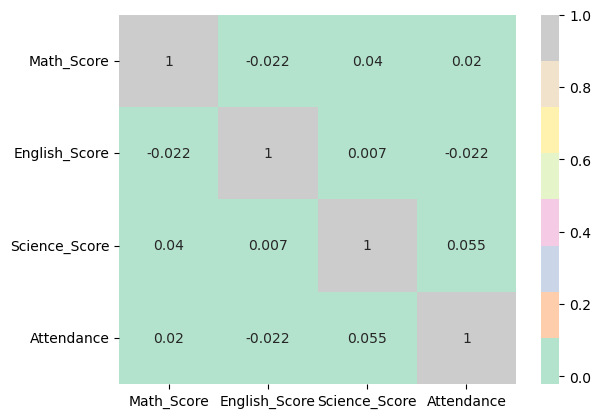

In [40]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='Pastel2',annot=True)
plt.tittle("correlation matrix")
plt.show()

In [41]:
df.to_csv('mark_sheet_clean_dataset.csv', index=False)

In [42]:
df = pd.read_csv("mark_sheet_clean_dataset.csv")

In [43]:
df

,Math_Score,English_Score,Science_Score,Attendance
0,79.967142,86.792265,72.598574,75.460962
1,73.617357,81.095604,76.843851,80.698075
2,81.476885,70.715564,71.660641,82.931972
3,90.230299,62.236759,75.536308,94.438438
4,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...
1000,45.060838,34.331166,53.609156,40.000000
1001,105.378939,107.424099,102.433148,100.000000
1002,79.967142,86.792265,72.598574,75.460962
1003,73.617357,81.095604,76.843851,80.698075
